In [1]:
#filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#reading the data
day = pd.read_csv('day.csv')

In [4]:
#exploring the data
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
#checking the number of rows and columns of the dataset
day.shape

(730, 16)

In [6]:
#checking the information of the dataset
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [7]:
#checking summary of numeric columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking for null values/missing values
#percentage of null values
((day.isnull().sum()/len(day.index))*100).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

There are no null values, as visible

In [9]:
#dropping instant column as its an index column
day.drop(['instant'], axis=1, inplace=True)

In [10]:
#checking head of the data
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#dropping dteday as column yr and month are doing the job
day.drop(['dteday'],axis=1,inplace=True)

In [12]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#replacing season column with appropriate values as it is a categorical column
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

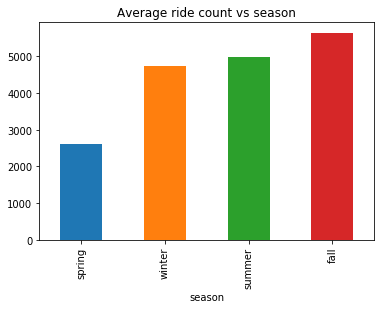

In [14]:
#plotting average ride count vs season
plt.title('Average ride count vs season')
season_dist = day.groupby(by='season').cnt.mean().sort_values()
season_dist.plot.bar()
plt.show()

The average riders count is highest for the season fall and least for the season spring.

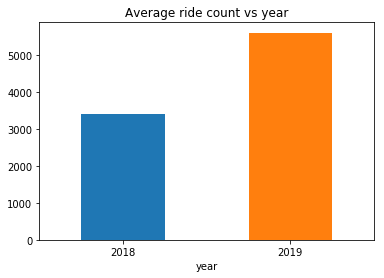

In [15]:
#plotting average ride count vs year
year_dist=day.groupby(by='yr').cnt.mean().sort_values()
plt.title('Average ride count vs year')
ax = year_dist.plot.bar()
ax.set_xlabel('year')
ax.set_xticklabels(['2018', '2019'], rotation=0)
plt.show()

The average riders count is significantly higher for the year 2019 as compared to 2018.

In [16]:
#replacing month number to month name
import datetime 
day['mnth']= day['mnth'].apply(lambda x: datetime.date(1099, x, 1).strftime('%B'))

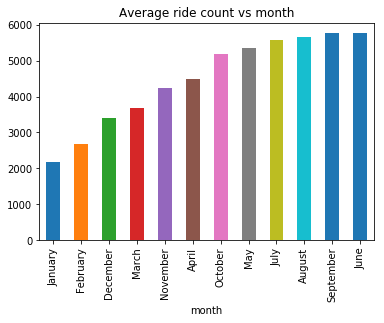

In [17]:
#plotting average ride count vs month
month_dist=day.groupby(by='mnth').cnt.mean().sort_values()
plt.title('Average ride count vs month')
month_dist.plot.bar()
plt.xlabel('month')
plt.show()

For September and June, the average riders count is the highest out of all the months, and the count is the least for january i.e. there are lesser riders in january.

In [18]:
#replacing weekday column with appropriate values
day['weekday'] = day['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

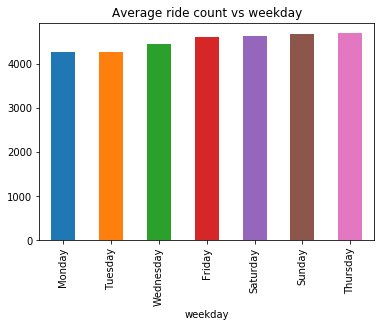

In [19]:
#plotting average ride count vs weekday
weekday_dist=day.groupby(by='weekday').cnt.mean().sort_values()
plt.title('Average ride count vs weekday')
weekday_dist.plot.bar()
plt.show()

For friday, saturday, sunday and thursday, the average count is higher than the rest of the week days.

In [20]:
#replacing weathersit column with appropriate values
day['weathersit'] = day['weathersit'].map({1:'clear', 2:'mist', 3:'light_snow_rain_thunder', 4:'heavy_snow_rain_thunder'})

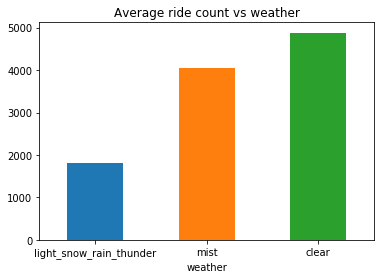

In [21]:
#plotting average ride count vs weather situation
weather_dist = day.groupby(by='weathersit').cnt.mean().sort_values()
plt.title('Average ride count vs weather')
weather_dist.plot.bar()
plt.xlabel('weather')
plt.xticks(rotation=0)
plt.show()

Its clear that there are more riders when the weather is clear, and the least rider count when there is light snow or rain or thunderstorm

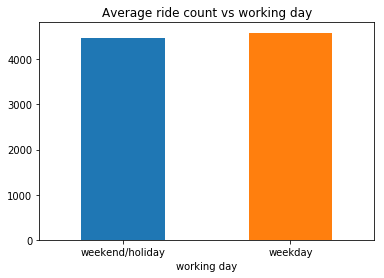

In [22]:
#ploting average ride count vs working day
workingday_dist=day.groupby(by='workingday').cnt.mean().sort_values()
plt.title('Average ride count vs working day')
ax = workingday_dist.plot.bar()
ax.set_xlabel('working day')
ax.set_xticklabels(['weekend/holiday', 'weekday'],rotation=0)
plt.show()

There doesn't seem to have a significant difference between weekday and weekend/holiday count, but for weekdays its surely higher.

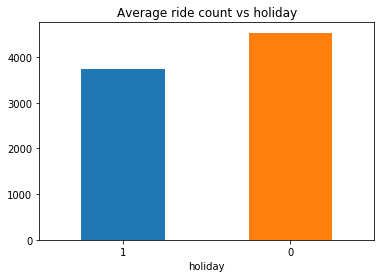

In [23]:
#plotting average ride count vs holiday
holiday_dist = day.groupby(by='holiday').cnt.mean().sort_values()
plt.title('Average ride count vs holiday')
holiday_dist.plot.bar()
plt.xticks(rotation=0)
plt.show()

In the case of category 0(not a holiday), average count is more. i.e. there is more demand of bikes on a working day.

In [24]:
#checking datatypes
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 79.9+ KB


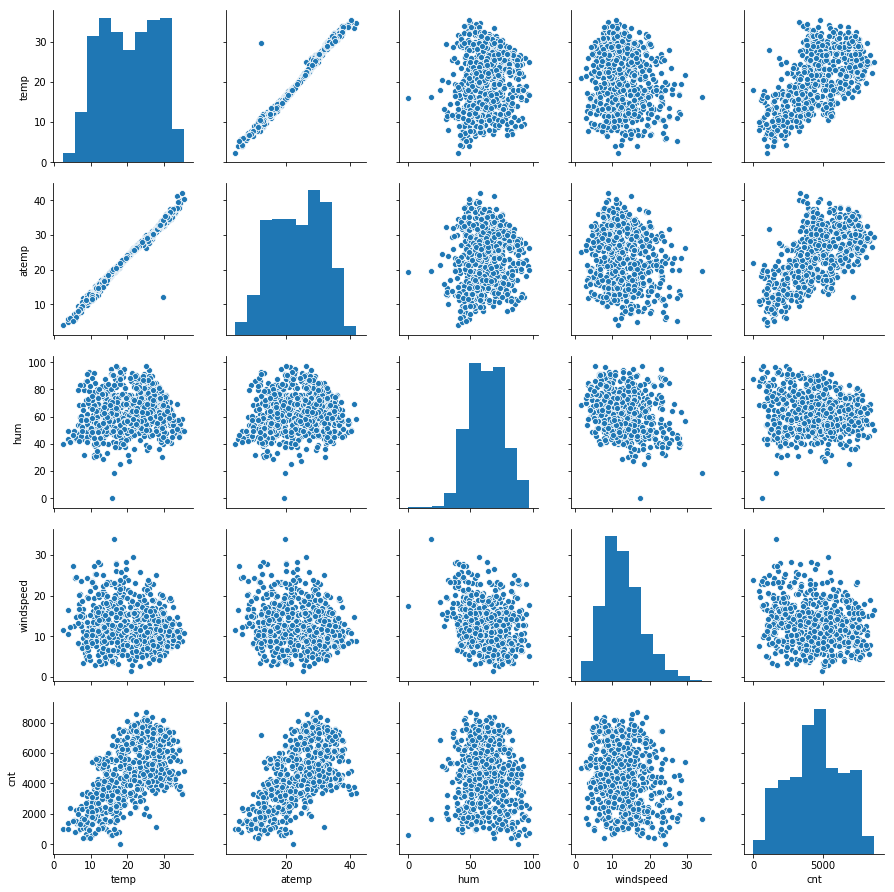

In [25]:
#paiplot to understand numerical variables
sns.pairplot(data= day, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

- 'temp' and 'atemp' seems to have a strong positive relationship.
- 'temp'and 'atemp' seems to have a positive relationship with 'cnt'.
- there can be a negative relationship between 'temp' and 'windspeed' and 'atemp' and 'windspeed'.
- the data points of 'hum' and 'windspeed' are scattered in a way that it can be a negative relationship.

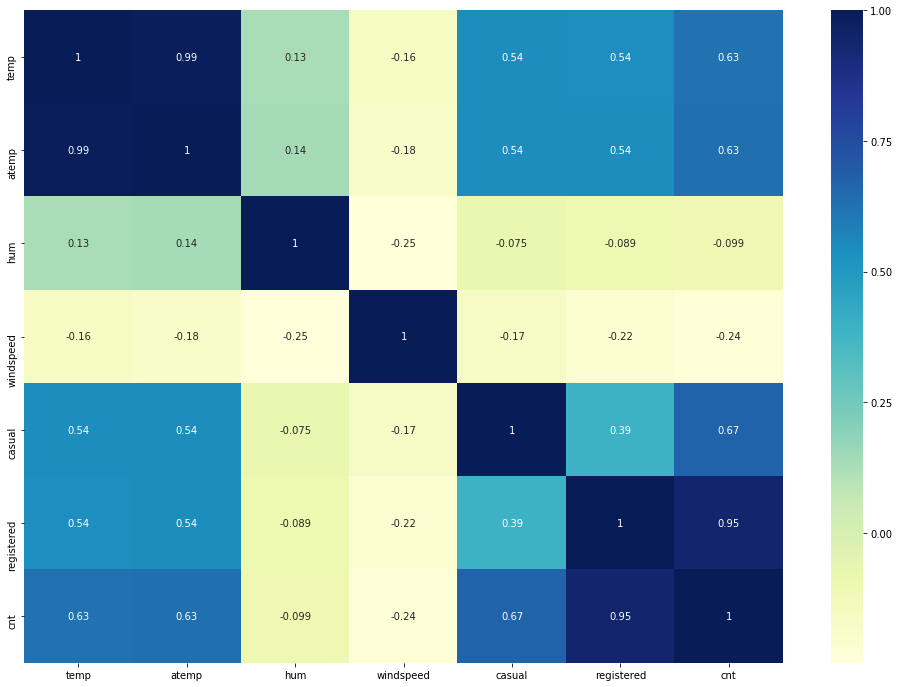

In [26]:
#checking the correlation of numerical variables
plt.figure(figsize=(17,12))
columns = day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
sns.heatmap(columns.corr(), annot=True, cmap= 'YlGnBu')
plt.show()

- 'temp' and 'atemp' are almost perfectly correlated i.e. 0.99 which is almost 1, so 'temp' alone would do the job. 
- 'cnt' is highly correlated to 'registered'
- 'cnt' seems to have a moderate positive relationship with 'temp' and 'atemp'.
- there is a negative relationship between 'temp','atemp' and 'windspeed'
- there is a negative relationship between 'cnt' and 'hum' and also, 'cnt' and 'windspeed'. i.e humidity and windspeed is negatively affecting the riders count.

In [27]:
#dropping 'atemp' as 'temp' and 'atemp' are almost perfectly correlated i.e. 0.99
day.drop(['atemp'], axis=1, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Friday,1,clear,9.305237,43.6957,12.522300,82,1518,1600


In [28]:
#our aim is to predict the final ride count so we will drop the columns casual and registered
day.drop(['casual','registered'], axis=1, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


In [29]:
#checking the data types
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.8+ KB


#### Dummy variables

In [30]:
#list of columns to get dummy variables
dummy_var_columns = ['season', 'mnth', 'weekday', 'weathersit']

In [31]:
#getting dummy variables and storing it in status
status = pd.get_dummies(day[dummy_var_columns], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow_rain_thunder,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#adding results to the original dataframe
day = pd.concat([day, status], axis=1)

In [33]:
#dropping the original columns as we have created the dummmies for it
day.drop(columns=dummy_var_columns, axis=1, inplace=True)

In [34]:
#checking the head of our dataframe
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow_rain_thunder,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the data into training and testing sets

In [35]:
#spliting the data
day_train, day_test = train_test_split(day, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the features

In [36]:
scaler = MinMaxScaler()

In [37]:
#applying scaler to the numerical columns
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
#checking the head of our train data
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow_rain_thunder,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
#checking the discriptive statistics of our train data
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow_rain_thunder,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


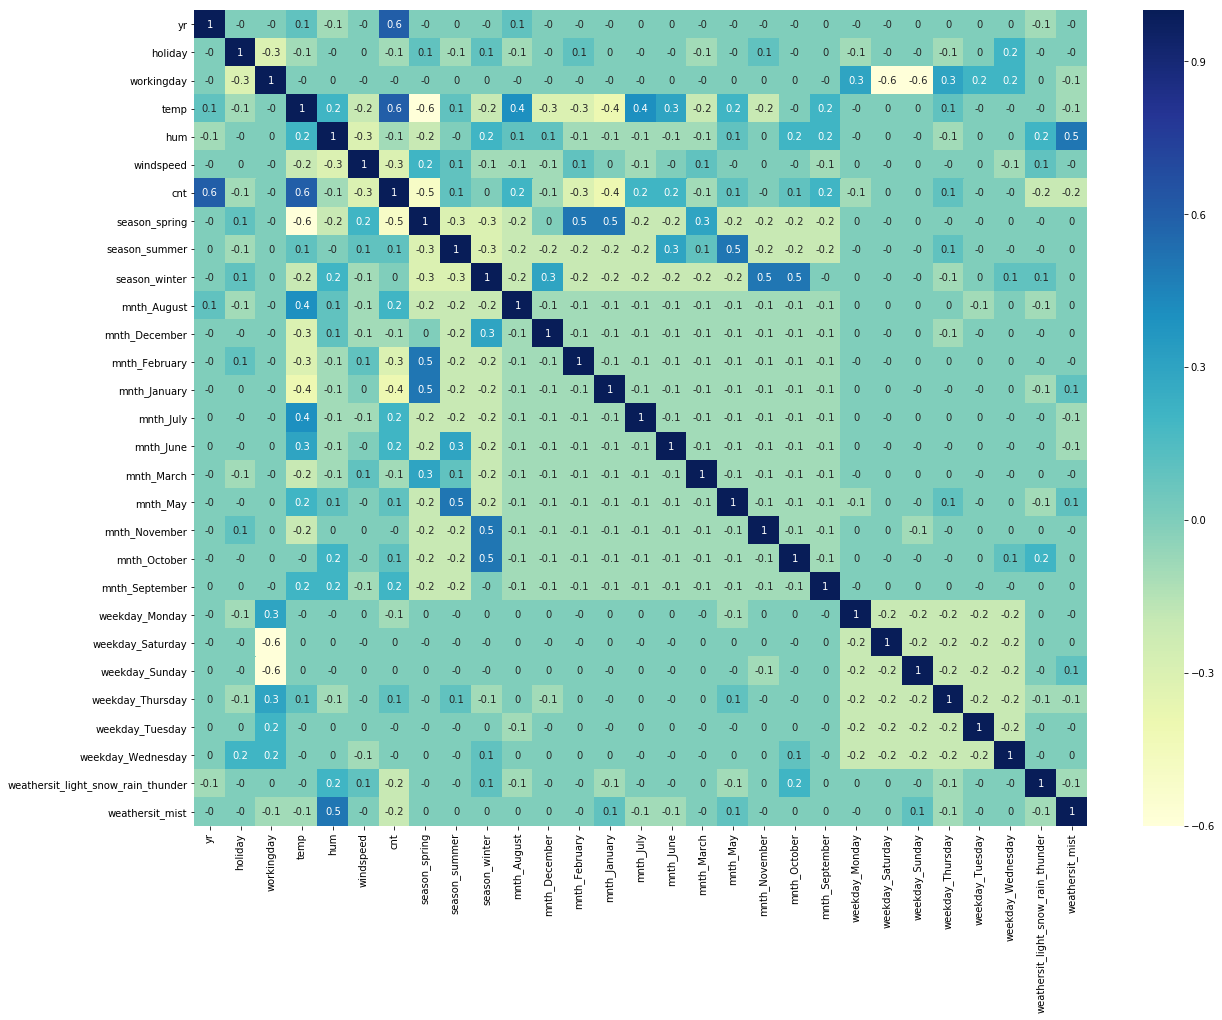

In [40]:
#analysing the variables using correlation coefficient
plt.figure(figsize=(20,15))
sns.heatmap(round(day_train.corr(),1),annot=True, cmap='YlGnBu')
plt.show()

From the above graph, we can see that no two variables are highly correlated with each other so we can move forward to model building and check for multicollinearity

#### Dividing into X and Y sets for model building

In [41]:
#Dividing into X and Y sets for model building
y_train = day_train.pop('cnt')
x_train = day_train

#### Building a linear model

In [42]:
#running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(x_train, y_train)

In [43]:
#list of columns with rfe ranking
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('weathersit_light_snow_rain_thunder', True, 1),
 ('weathersit_mist', True, 1)]

In [44]:
#columns chosen by rfe
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_light_snow_rain_thunder', 'weathersit_mist'],
      dtype='object')

#### Building model using statsmodels

In [45]:
#creating a dataframe with RFE selected variables, adding a constant and running the linear model
x_train_rfe = x_train[col]
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.34e-189
Time:                        16:54:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [46]:
#calculating the VIFs
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


In [47]:
#column 'hum' has a very high VIF so we drop it
x_train_rfe = x_train_rfe.drop('hum', axis=1)

In [48]:
#adding a constant variable and running the model
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.57e-186
Time:                        16:54:43   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
#calculating the VIFs of the new model
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_mist,1.56


In [50]:
#column 'windspeed' has a high VIF so we drop the column
x_train_rfe = x_train_rfe.drop('windspeed', axis=1)

In [51]:
#adding a constant variable and running the model
x_train_rfe2 = sm.add_constant(x_train_rfe)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.92e-179
Time:                        16:54:58   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
#season_summer has a high p-value so we drop the column
x_train_rfe = x_train_rfe.drop('season_summer', axis=1)

In [53]:
#adding a constant variable and running the linear model
x_train_rfe3 = sm.add_constant(x_train_rfe)
lm3 = sm.OLS(y_train, x_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.48e-180
Time:                        16:55:03   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [54]:
#calculating VIFs of the new model
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.04
4,season_winter,2.51
0,yr,2.05
3,season_spring,1.93
8,mnth_November,1.78
6,mnth_January,1.65
11,weathersit_mist,1.52
5,mnth_December,1.46
7,mnth_July,1.34
9,mnth_September,1.20


In [55]:
#dropping 'mnth_January' for a better model
x_train_rfe = x_train_rfe.drop('mnth_January', axis=1)

In [56]:
#adding a constant variable and running the linear model
x_train_rfe4 = sm.add_constant(x_train_rfe)
lm4 = sm.OLS(y_train, x_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.34e-180
Time:                        16:55:43   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [57]:
#dropping 'mnth_December' as it has high p-value
x_train_rfe = x_train_rfe.drop('mnth_December', axis=1)

In [58]:
#adding a constant variable and running the linear model
x_train_rfe5 = sm.add_constant(x_train_rfe)
lm5 = sm.OLS(y_train, x_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          7.68e-181
Time:                        16:55:56   Log-Likelihood:                 480.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [59]:
#droppping 'mnth_November' as it has high p-value
x_train_rfe = x_train_rfe.drop('mnth_November', axis=1)

In [60]:
#adding a constant variable and running the linear model
x_train_rfe6 = sm.add_constant(x_train_rfe)
lm6 = sm.OLS(y_train, x_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.16e-181
Time:                        16:56:06   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [61]:
#calculating VIFs of the new model
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,weathersit_mist,1.51
4,season_winter,1.33
5,mnth_July,1.33
3,season_spring,1.25
6,mnth_September,1.19
7,weathersit_light_snow_rain_thunder,1.06
1,holiday,1.04


#### Residual Analysis

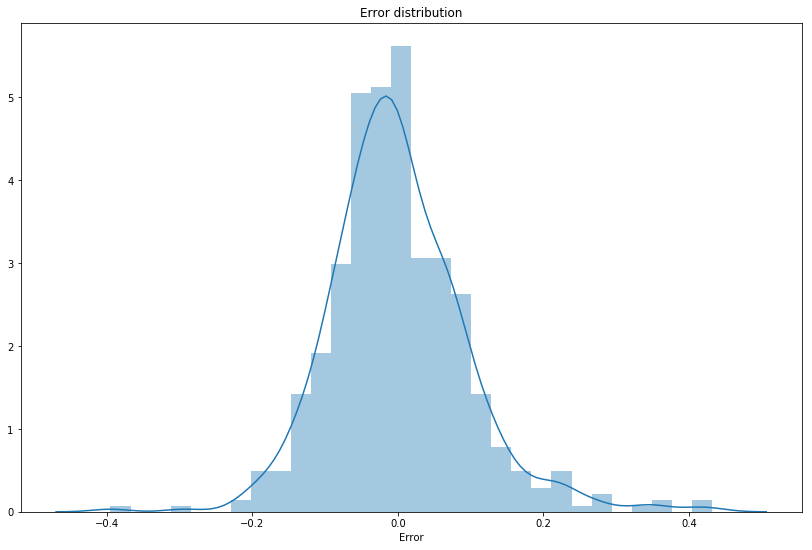

In [62]:
#error terms are normaly distributed
y_train_cnt = lm6.predict(x_train_rfe6)
plt.figure(figsize=(14,9))
sns.distplot((y_train_cnt-y_train))
plt.title('Error distribution')
plt.xlabel('Error')
plt.show()

Its visible that error terms are normally distributed around 0, which means the assumption of error terms being normally distributed is taken care of.

#### Prediction on test data

In [63]:
#applying scaler on the test data
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])

In [64]:
#dividing into x_test and y_test
y_test = day_test.pop('cnt')
x_test = day_test

In [65]:
#checking features of the model
x_train_rfe6.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'mnth_July', 'mnth_September', 'weathersit_light_snow_rain_thunder',
       'weathersit_mist'],
      dtype='object')

In [66]:
#creating x_train_new dataframe by dropping 'const' variable 
x_train_new = x_train_rfe6.drop('const', axis=1)

In [67]:
#creating x_test_new dataframe
x_test_new = x_test[x_train_new.columns]

In [68]:
#adding a constant
x_test_new = sm.add_constant(x_test_new)

In [69]:
#making predictions
y_pred = lm6.predict(x_test_new)

Text(0, 0.5, 'y_pred')

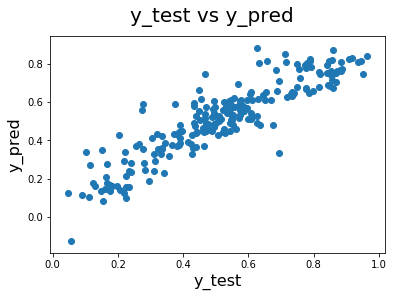

In [70]:
#plotting y_test vs y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=16)                          
plt.ylabel('y_pred', fontsize=16)  

Above scatter plot shows a linear relationship between Actual test Data points and Predicted test data points.
That means, the lm6 fit is not by chance but it has decent predictive power.

In [71]:
#calculating test r squared
r_squared = r2_score(y_test,y_pred) 
r_squared

0.8092200832884748

In [72]:
#calculating test Adjusted r squared
n = x_test_new.shape[0]
p = x_test_new.shape[1]
adj_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adj_r_squared

0.800047971908113

## Result: 


Equation of best fitted line:

cnt = 0.1938 + 0.2330*yr - 0.1011*holiday + 0.4712*temp - 0.1107*season_spring + 0.05588*season_winter - 
0.0688*mnth_July + 0.0658*mnth_September - 0.3002*weathersit_light_snow_rain_thunder - 0.0796*weather_mist

- Train R^2 = 0.823
- Train Adjusted R^2 = 0.819
- Test R^2 = 0.809
- Test Adjusted R^2 = 0.800

- From r_squared and adjusted r_squared of both train and test data we can say that above variables can explain around 80% of the bike demand

- coefficients of variables explain the factors affecting the demand of bikes.
 
- demand increases due to these factors: yr(year), temp(temperature), season_winter and mnth_September
           
- demand decreases due to these factors: holiday, season_spring, mnth_July, weathersit_light_snow_rain_thunder and weather_mist

- top 3 features based on our final model contributing significantly towards explaining the demand:
     - temperature (0.4712)
     - weathersit: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.3002)
     - year (0.2330)



So, it is recomended to give these variables utmost importance while planning to achieve maximum demand